# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from api_keys import api_key

# Import API key
import api_keys

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
        
    # If the city is unique, then add it to a our cities list
    if city not in cities:

        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


609

In [3]:
# OpenWeatherMap API Key
api_key = api_keys.api_key

# Starting URL for API call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
city_name = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []

# Start counter 
record = 1

print(f"Connecting to OpenWeatherMap API")
print(f"===================================")

# Loop through all cities in the list
for city in cities:  
    
    try: 
        response = requests.get(f"{url}&q={city}").json() 
        city_name.append(response["name"])
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        max_temp.append(response["main"]["temp_max"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        wind_speed.append(response["wind"]["speed"])
        city_record = response["name"]
        print(f"Processing Record {record} | {city_record}")
       
        
        # Add to counter
        record= record + 1
        
        
    # Skip if no match found
    except:
        print("City not found. Skipping...")
    continue
    

       
print(f"---------------------------")

print(f"Data Retrieval Complete")

print(f"---------------------------")

Connecting to OpenWeatherMap API
Processing Record 1 | Bluff
Processing Record 2 | Thompson
Processing Record 3 | Iqaluit
Processing Record 4 | Avarua
Processing Record 5 | Mount Gambier
Processing Record 6 | Punta Arenas
Processing Record 7 | Ushuaia
Processing Record 8 | Nikolskoye
Processing Record 9 | Pirgos
City not found. Skipping...
Processing Record 10 | Jamestown
Processing Record 11 | Rikitea
Processing Record 12 | Pochutla
Processing Record 13 | Rocha
Processing Record 14 | Kapaa
Processing Record 15 | Bhilwara
Processing Record 16 | Tsuruga
City not found. Skipping...
Processing Record 17 | Vaini
Processing Record 18 | Labuhan
Processing Record 19 | Westport
City not found. Skipping...
Processing Record 20 | Moron
Processing Record 21 | Port-Gentil
Processing Record 22 | Mataura
Processing Record 23 | Uray
Processing Record 24 | Broome
Processing Record 25 | Gejiu
Processing Record 26 | Esperance
City not found. Skipping...
City not found. Skipping...
Processing Record 27 |

Processing Record 225 | Koscierzyna
Processing Record 226 | Isparta
Processing Record 227 | Tuatapere
Processing Record 228 | Payo
Processing Record 229 | Alyangula
Processing Record 230 | Homa Bay
Processing Record 231 | Mahebourg
Processing Record 232 | Balikpapan
Processing Record 233 | Meadow Lake
City not found. Skipping...
Processing Record 234 | Huarmey
Processing Record 235 | Ternate
Processing Record 236 | Saint-Pierre
Processing Record 237 | Half Moon Bay
Processing Record 238 | Paraiso
Processing Record 239 | Bandarbeyla
Processing Record 240 | Hervey Bay
Processing Record 241 | Samana
Processing Record 242 | Souillac
Processing Record 243 | Kavieng
Processing Record 244 | Bibiani
Processing Record 245 | Vanavara
Processing Record 246 | Atar
Processing Record 247 | Saravan
Processing Record 248 | Vila Franca do Campo
Processing Record 249 | Georgetown
Processing Record 250 | Leshukonskoye
Processing Record 251 | Ancud
Processing Record 252 | Klaksvik
City not found. Skipping

Processing Record 453 | Walla Walla
Processing Record 454 | Jieshi
Processing Record 455 | Forio
Processing Record 456 | Seybaplaya
Processing Record 457 | Kaka
Processing Record 458 | Sainte-Rose
City not found. Skipping...
Processing Record 459 | Glendive
Processing Record 460 | Valparaiso
Processing Record 461 | Taoudenni
Processing Record 462 | Cape Coast
Processing Record 463 | Ilo
Processing Record 464 | Madang
Processing Record 465 | Narva-Joesuu
Processing Record 466 | Morondava
Processing Record 467 | Wajima
Processing Record 468 | Pangody
Processing Record 469 | Puerto Ayacucho
Processing Record 470 | Mehamn
Processing Record 471 | Contai
City not found. Skipping...
Processing Record 472 | Grand-Santi
Processing Record 473 | Atherton
Processing Record 474 | Biltine
Processing Record 475 | Ipatinga
Processing Record 476 | Mana
Processing Record 477 | Tabou
Processing Record 478 | Kavaratti
Processing Record 479 | Urusha
City not found. Skipping...
Processing Record 480 | Yerbo

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
weatherpy_dictionary = {
    "City": city_name,
    "Cloudiness":cloudiness, 
    "Country":country,
    "Date":date, 
    "Humidity": humidity,
    "Lat":lat, 
    "Lng":lng, 
    "Max Temp": max_temp,
    "Wind Speed":wind_speed}

# Create df 
weather_data = pd.DataFrame(weatherpy_dictionary)

# Display count
weather_data.count()


City          551
Cloudiness    551
Country       551
Date          551
Humidity      551
Lat           551
Lng           551
Max Temp      551
Wind Speed    551
dtype: int64

In [6]:
# Save data frame to CSV
weather_data.to_csv('weather_data.csv')

# Display data frame head 
weather_data.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Bluff,0,AU,1554086223,47,-23.58,149.07,79.13,6.98
1,Thompson,75,CA,1554084000,62,55.74,-97.86,24.80,5.82
2,Iqaluit,75,CA,1554084000,77,63.75,-68.52,3.20,5.82
3,Avarua,0,CK,1554084000,83,-21.21,-159.78,80.60,12.75
4,Mount Gambier,90,AU,1554084000,51,-37.83,140.78,62.60,5.82


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

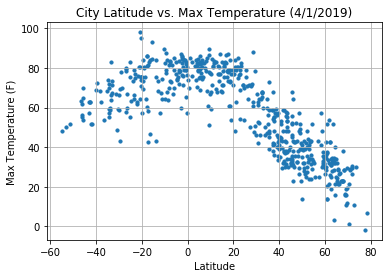

In [7]:
plt.scatter(weather_data["Lat"], weather_data["Max Temp"], marker="o", s=10)
plt.title("City Latitude vs. Max Temperature (4/1/2019)")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("MaxTemp_v_Latitude.png")
plt.show()

#### Latitude vs. Humidity Plot

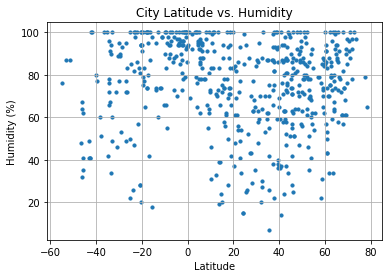

In [8]:
plt.scatter(weather_data["Lat"], weather_data["Humidity"], marker="o", s=10)
plt.title("City Latitude vs. Humidity")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("Humidity_v_Latitude.png")
plt.show()

#### Latitude vs. Cloudiness Plot

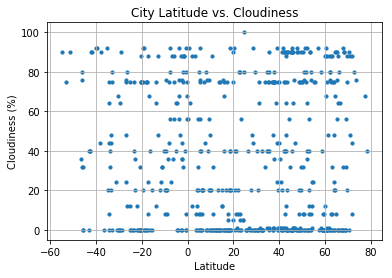

In [9]:
plt.scatter(weather_data["Lat"], weather_data["Cloudiness"], marker="o", s=10)
plt.title("City Latitude vs. Cloudiness")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("Cloudiness_v_Latitude.png")
plt.show()

#### Latitude vs. Wind Speed Plot

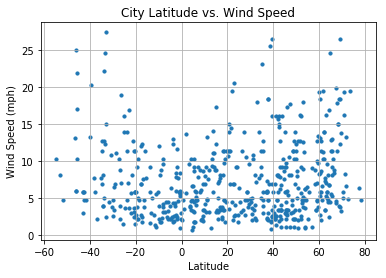

In [10]:
plt.scatter(weather_data["Lat"], weather_data["Wind Speed"], marker="o", s=10)
plt.title("City Latitude vs. Wind Speed")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("WindSpeed_v_Latitude.png")
plt.show()